<h1> Exercise 2 Classifiers <h1>

In [3]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import precision_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from scipy import stats
from sklearn import preprocessing

In [4]:
gl = pd.read_csv ('glass.csv')
gl1 = gl[0:70]
gl2 = gl[71:147]
gl3 = gl[147:164]
gl4 = gl[165:177]
gl5 = gl[178:186]
gl6 = gl[187:215]

<p> The first thing that is a requirement to continue the data processing phase is to scale the data into 0 and 1.This will happen with the help of sklearn processing package which contains the minmaxScaler function inside so... <p>

<h6> But before scaling the data we have to carefuly hanndle the outliers <h6>

<p> now the outliers are numbers within the data that can be easily seperated by the
rest data that we are processing.Some tend to remove the outliers and some do not but the
truth is that it depends the data that we are processing.Ex. Bank property values or the age of
the high school students that are studying in a specific town(maybe someone older started high 
            school becuase in the pass they could not finished it for various reasons )etc...<p>

<p> In our case i will not delete the outliers because i am not a chem engineer and i don't know what to cut off and what values to keep inside the data so for the purpose of the exercise i will delete the outliers <p>

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
A_minmax = min_max_scaler.fit_transform(gl)
A_minmax

array([[0.        , 0.43283582, 0.43759398, ..., 0.        , 0.        ,
        0.        ],
       [0.00469484, 0.28358209, 0.47518797, ..., 0.        , 0.        ,
        0.        ],
       [0.00938967, 0.22080773, 0.42105263, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99061033, 0.41703248, 0.54586466, ..., 0.52063492, 0.        ,
        1.        ],
       [0.99530516, 0.23529412, 0.54887218, ..., 0.4984127 , 0.        ,
        1.        ],
       [1.        , 0.26163301, 0.52631579, ..., 0.53015873, 0.        ,
        1.        ]])

In [6]:
del gl1["ID"]
del gl1["Type of glass"]
gl1.describe()

,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
std,0.002268,0.499301,0.247043,0.273158,0.569484,0.214879,0.574807,0.083838,0.089075
min,1.512150,12.450000,2.710000,0.290000,71.350000,0.000000,7.780000,0.000000,0.000000
25%,1.517540,12.825000,3.480000,1.112500,72.080000,0.200000,8.430000,0.000000,0.000000
50%,1.517835,13.195000,3.565000,1.230000,72.815000,0.560000,8.675000,0.000000,0.000000
75%,1.519560,13.525000,3.657500,1.327500,73.017500,0.590000,9.052500,0.000000,0.110000
max,1.526670,14.770000,4.490000,1.690000,73.700000,0.690000,10.170000,0.690000,0.310000


In [7]:
del gl2["ID"]
del gl2["Type of glass"]
gl2.describe()

,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1.518644,13.095789,3.001974,1.399868,72.609868,0.520395,9.090000,0.050263,0.078158
std,0.003789,0.635579,1.215589,0.317786,0.719855,0.214926,1.912132,0.362340,0.106717
min,1.514090,10.730000,0.000000,0.560000,69.810000,0.000000,7.080000,0.000000,0.000000
25%,1.516438,12.885000,3.057500,1.237500,72.337500,0.480000,8.047500,0.000000,0.000000
50%,1.517205,13.155000,3.520000,1.445000,72.750000,0.580000,8.295000,0.000000,0.000000
75%,1.518487,13.432500,3.622500,1.562500,73.062500,0.650000,8.915000,0.000000,0.155000
max,1.533930,14.430000,3.980000,2.120000,74.450000,1.100000,16.190000,3.150000,0.350000


In [8]:
del gl3["ID"]
del gl3["Type of glass"]
gl3.describe()

,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1.517814,13.458235,3.485882,1.341765,72.235294,0.498824,8.622353,0.138235,0.057059
std,0.002035,0.523584,0.262156,0.655374,0.786655,0.373712,0.803318,0.532544,0.107864
min,1.515140,12.160000,2.680000,0.580000,69.890000,0.000000,5.870000,0.000000,0.000000
25%,1.516460,13.240000,3.400000,0.910000,71.940000,0.230000,8.440000,0.000000,0.000000
50%,1.516940,13.420000,3.520000,1.310000,72.610000,0.560000,8.790000,0.000000,0.000000
75%,1.518320,13.640000,3.580000,1.520000,72.690000,0.580000,8.930000,0.000000,0.090000
max,1.522110,14.320000,3.900000,3.500000,73.010000,1.680000,9.650000,2.200000,0.370000


In [9]:
del gl4["ID"]
del gl4["Type of glass"]
gl4.describe()

,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1.519235,12.835000,0.660000,1.886667,72.545833,1.402500,10.435000,0.020000,0.065833
std,0.003286,0.809697,0.936357,0.569135,1.091641,2.260198,1.865376,0.069282,0.161384
min,1.513160,11.030000,0.000000,1.400000,70.480000,0.000000,6.930000,0.000000,0.000000
25%,1.518452,12.797500,0.000000,1.560000,72.210000,0.327500,9.667500,0.000000,0.000000
50%,1.520185,12.985000,0.000000,1.615000,72.615000,0.470000,11.295000,0.000000,0.000000
75%,1.521270,13.297500,1.635000,1.915000,73.402500,0.812500,11.552500,0.000000,0.000000
max,1.523690,14.000000,2.390000,3.040000,73.880000,6.210000,12.500000,0.240000,0.510000


In [10]:
del gl5["ID"]
del gl5["Type of glass"]
gl5.describe()

,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.0
mean,1.516249,14.715000,1.268750,1.420000,73.31750,0.220000,8.78750,0.148750,0.0
std,0.003734,1.141841,1.242801,0.623515,1.10075,0.622254,2.05042,0.420729,0.0
min,1.511150,13.690000,0.000000,0.340000,72.38000,0.000000,5.43000,0.000000,0.0
25%,1.512570,14.135000,0.000000,1.295000,72.62750,0.000000,7.35500,0.000000,0.0
50%,1.518405,14.430000,1.260000,1.640000,72.77500,0.000000,9.29000,0.000000,0.0
75%,1.518950,14.667500,2.202500,1.757500,73.74750,0.000000,10.18250,0.000000,0.0
max,1.519690,17.380000,3.200000,2.090000,75.41000,1.760000,11.22000,1.190000,0.0


In [11]:
del gl6["ID"]
del gl6["Type of glass"]
gl6.describe()

,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000
mean,1.517284,14.474444,0.338889,2.130741,73.035185,0.23000,8.704815,1.012593,0.014444
std,0.002364,0.695637,0.864071,0.454854,0.912622,0.58578,0.576344,0.679483,0.030676
min,1.515080,11.950000,0.000000,1.190000,70.260000,0.00000,6.470000,0.000000,0.000000
25%,1.516110,14.215000,0.000000,1.905000,73.005000,0.00000,8.500000,0.585000,0.000000
50%,1.516510,14.560000,0.000000,2.060000,73.110000,0.00000,8.670000,0.760000,0.000000
75%,1.517230,14.890000,0.000000,2.465000,73.375000,0.08000,8.995000,1.580000,0.000000
max,1.523650,15.790000,3.340000,2.880000,75.180000,2.70000,9.760000,2.880000,0.090000


<h4> A function to boxplot every feature to look the outliers as a graph <h4>

In [12]:
def plot_boxplot (gl_r,ft):
    gl_r.boxplot(column = [ft])
    plt.grid("True")
    plt.show()

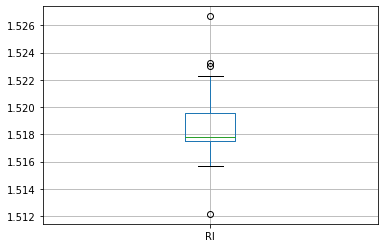

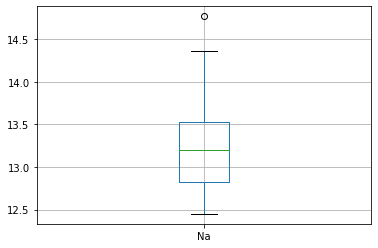

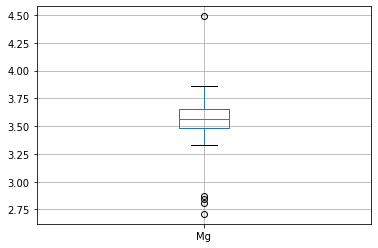

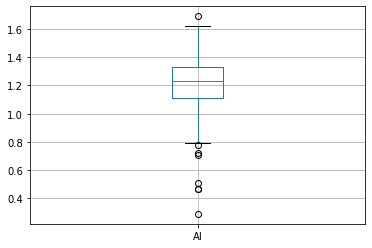

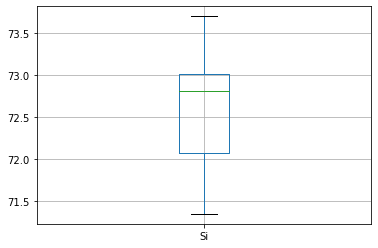

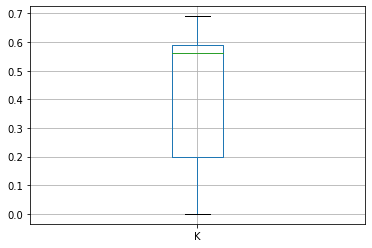

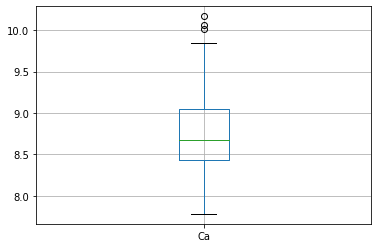

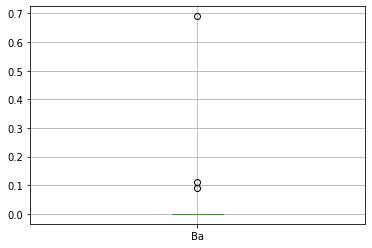

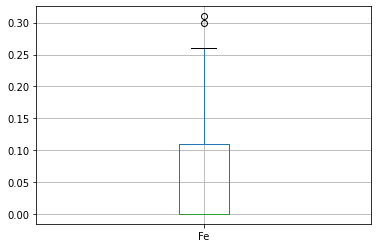

In [13]:
plot_boxplot(gl1,"Rl")
plot_boxplot(gl1,"Na")
plot_boxplot(gl1,"Mg")
plot_boxplot(gl1,"Al")
plot_boxplot(gl1,"Si")
plot_boxplot(gl1,"K")
plot_boxplot(gl1,"Ca")
plot_boxplot(gl1,"Ba")
plot_boxplot(gl1,"Fe")

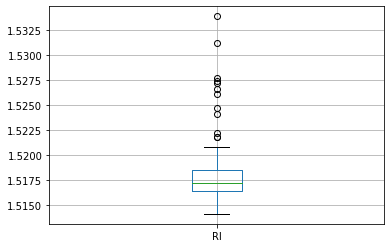

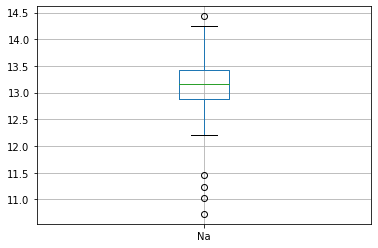

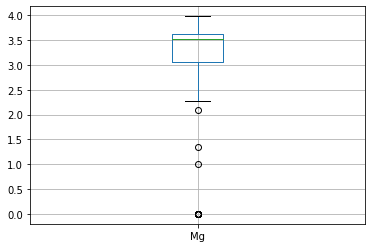

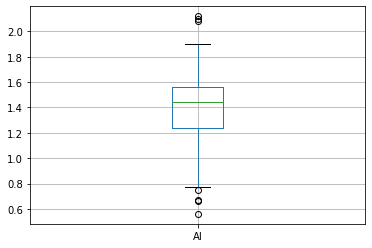

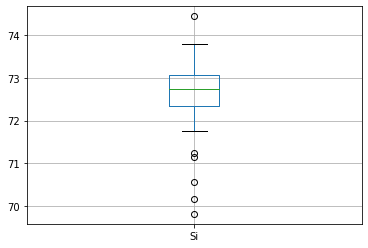

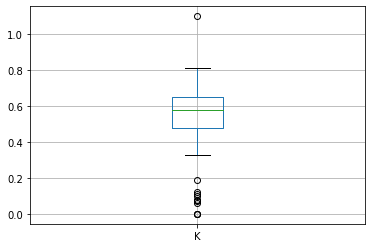

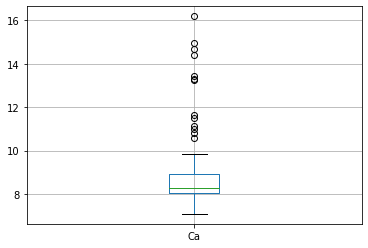

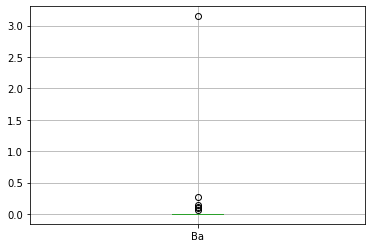

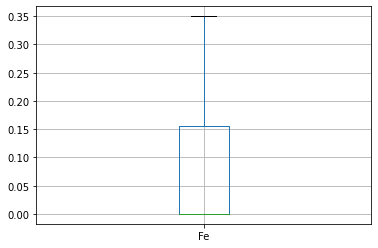

In [14]:
plot_boxplot(gl2,"Rl")
plot_boxplot(gl2,"Na")
plot_boxplot(gl2,"Mg")
plot_boxplot(gl2,"Al")
plot_boxplot(gl2,"Si")
plot_boxplot(gl2,"K")
plot_boxplot(gl2,"Ca")
plot_boxplot(gl2,"Ba")
plot_boxplot(gl2,"Fe")

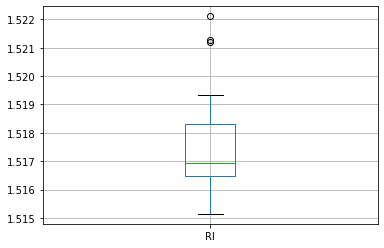

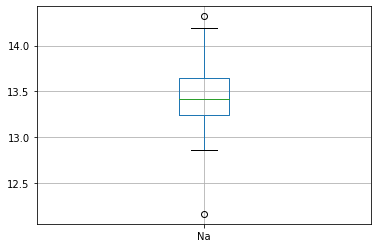

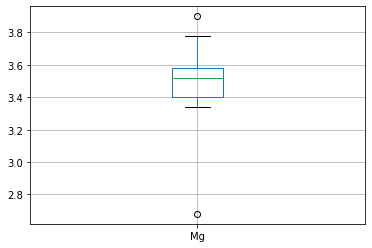

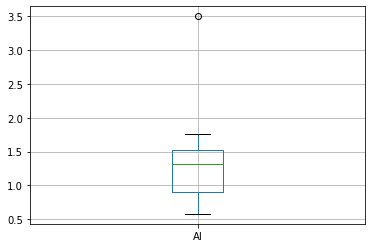

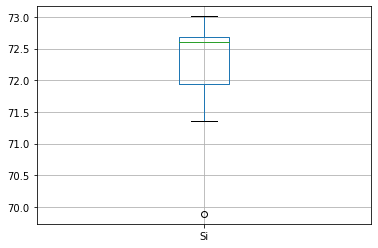

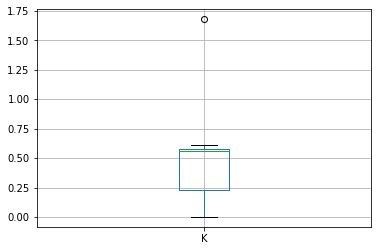

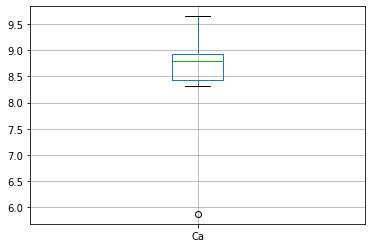

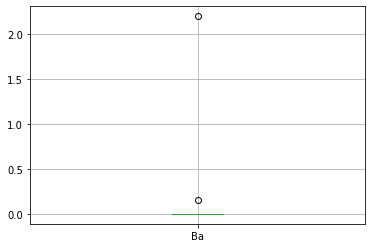

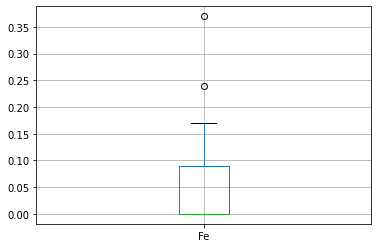

In [15]:
plot_boxplot(gl3,"Rl")
plot_boxplot(gl3,"Na")
plot_boxplot(gl3,"Mg")
plot_boxplot(gl3,"Al")
plot_boxplot(gl3,"Si")
plot_boxplot(gl3,"K")
plot_boxplot(gl3,"Ca")
plot_boxplot(gl3,"Ba")
plot_boxplot(gl3,"Fe")

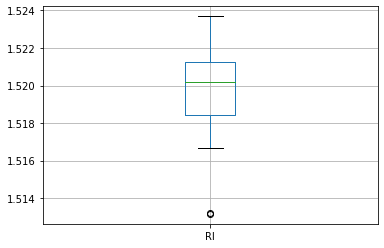

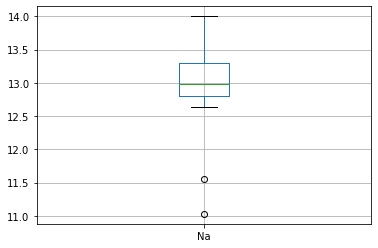

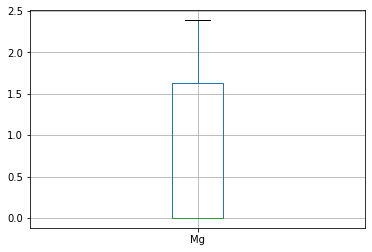

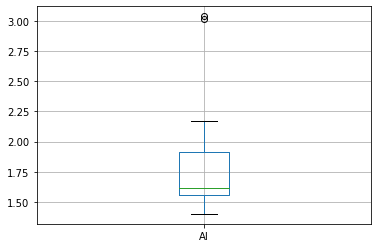

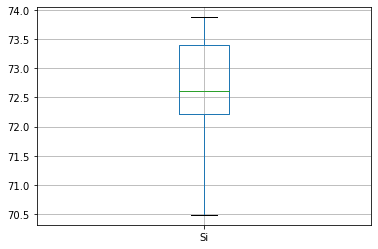

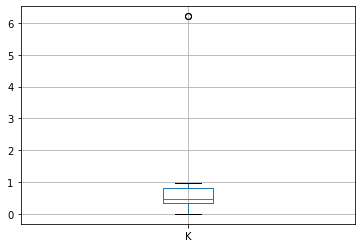

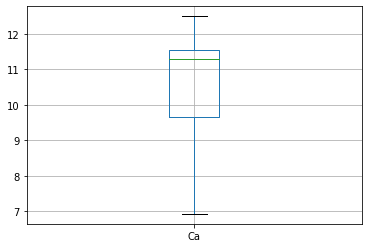

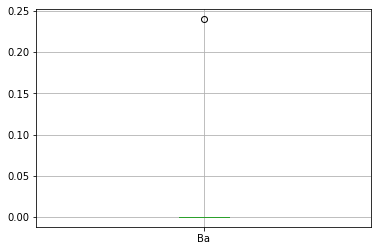

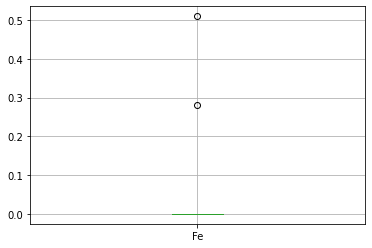

In [16]:
plot_boxplot(gl4,"Rl")
plot_boxplot(gl4,"Na")
plot_boxplot(gl4,"Mg")
plot_boxplot(gl4,"Al")
plot_boxplot(gl4,"Si")
plot_boxplot(gl4,"K")
plot_boxplot(gl4,"Ca")
plot_boxplot(gl4,"Ba")
plot_boxplot(gl4,"Fe")

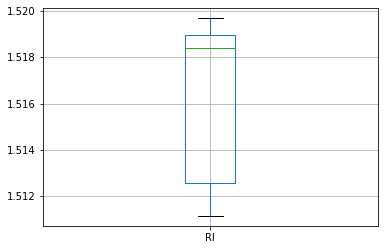

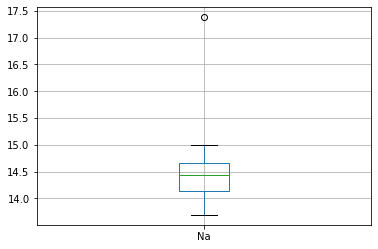

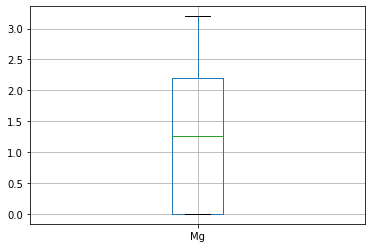

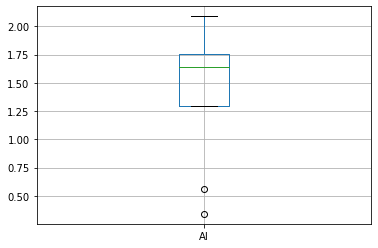

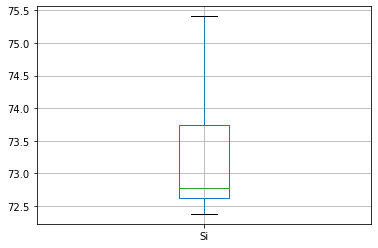

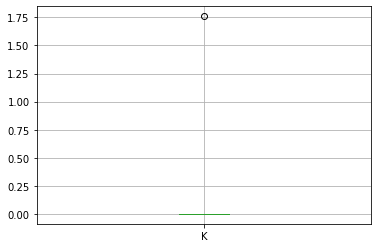

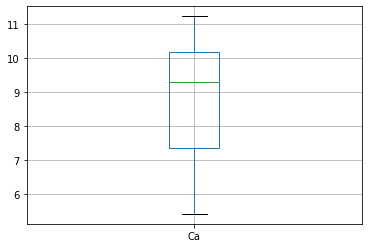

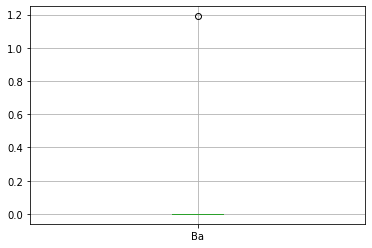

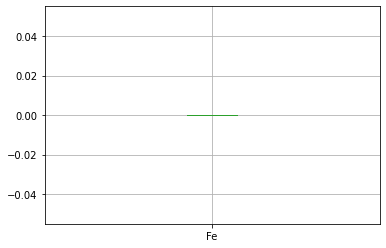

In [17]:
plot_boxplot(gl5,"Rl")
plot_boxplot(gl5,"Na")
plot_boxplot(gl5,"Mg")
plot_boxplot(gl5,"Al")
plot_boxplot(gl5,"Si")
plot_boxplot(gl5,"K")
plot_boxplot(gl5,"Ca")
plot_boxplot(gl5,"Ba")
plot_boxplot(gl5,"Fe")

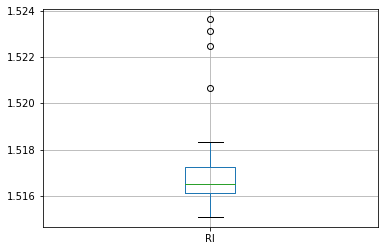

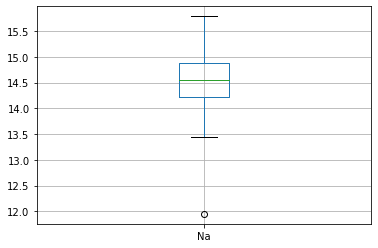

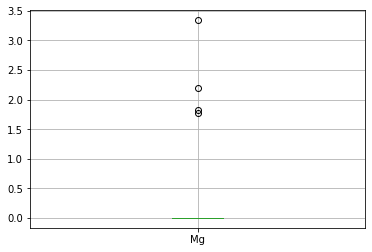

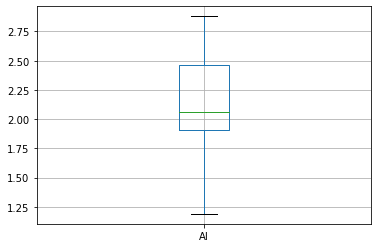

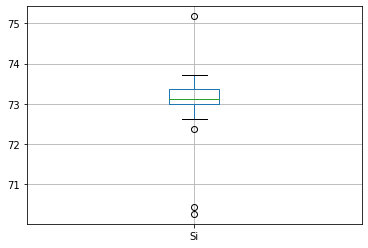

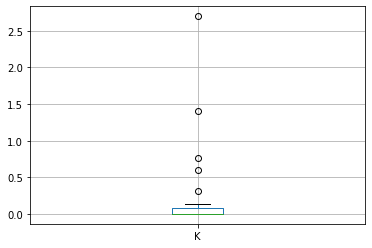

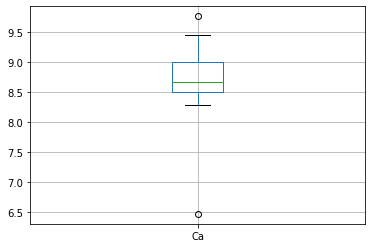

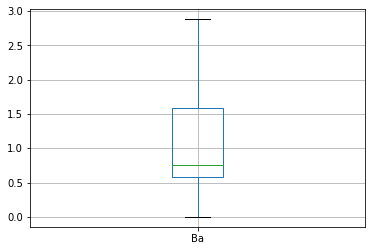

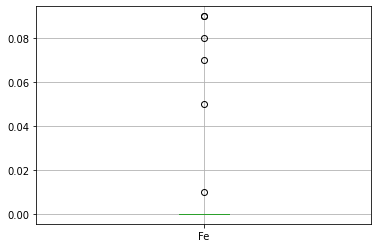

In [18]:
plot_boxplot(gl6,"Rl")
plot_boxplot(gl6,"Na")
plot_boxplot(gl6,"Mg")
plot_boxplot(gl6,"Al")
plot_boxplot(gl6,"Si")
plot_boxplot(gl6,"K")
plot_boxplot(gl6,"Ca")
plot_boxplot(gl6,"Ba")
plot_boxplot(gl6,"Fe")

<p>We see that there are a lot of outliers inside the data so that's not a good idea
because we will do data manimulation and we may change the results of the dataset we are not investement bankers sorry (also we are not a chem engineers they may need the outliers) <p>

In [19]:
X = gl[['Rl','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
y = gl['Type of glass']

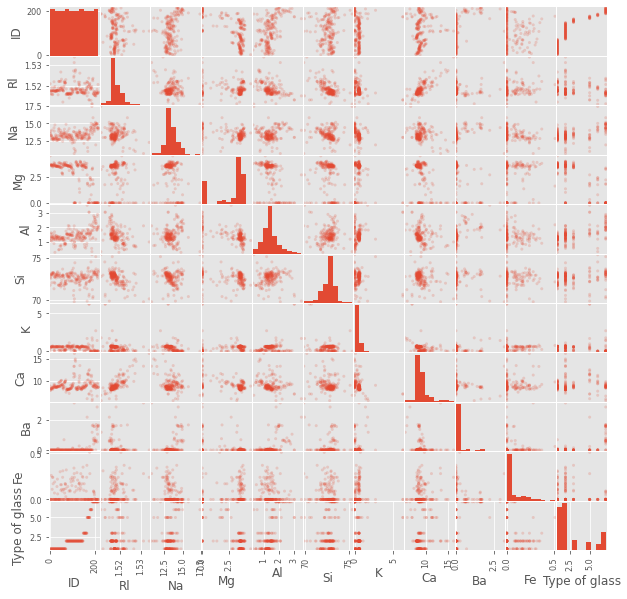

In [39]:
%matplotlib inline
plt.style.use('ggplot')
pd.plotting.scatter_matrix(gl, alpha=0.2, figsize=(10, 10))
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#plt.scatter()

In [22]:
X_train.shape, y_train.shape
clf = LinearDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.6976744186046512


array([[10,  1,  0,  0,  0,  0],
       [ 6,  8,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  1,  7]], dtype=int64)

In [23]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n');

report:
              precision    recall  f1-score   support

           1       0.53      0.91      0.67        11
           2       0.80      0.57      0.67        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.67      0.67      0.67         3
           7       0.88      0.88      0.88         8

    accuracy                           0.70        43
   macro avg       0.64      0.63      0.62        43
weighted avg       0.70      0.70      0.68        43



C:\Users\ConstaX\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ConstaX\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ConstaX\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [24]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train) 
y_pred=clf.predict(X_test)
print(clf.score(X_test, y_test))
conf_m = confusion_matrix(y_test, y_pred)
conf_m

0.5348837209302325


C:\Users\ConstaX\AppData\Roaming\Python\Python38\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


array([[9, 1, 1, 0, 0, 0],
       [7, 5, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 3, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 8]], dtype=int64)

In [25]:
report = classification_report(y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           1       0.53      0.82      0.64        11
           2       0.45      0.36      0.40        14
           3       0.33      0.33      0.33         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.67      1.00      0.80         8

    accuracy                           0.53        43
   macro avg       0.33      0.42      0.36        43
weighted avg       0.43      0.53      0.47        43



C:\Users\ConstaX\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ConstaX\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ConstaX\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [26]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=1).fit(X_train,y_train)
clf.score(X_test,y_test)

0.7441860465116279

In [27]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear',C=1)
score = cross_val_score(clf,X,y,cv=9)
score

array([0.54166667, 0.5       , 0.66666667, 0.58333333, 0.625     ,
       0.66666667, 0.45833333, 0.56521739, 0.69565217])